In [84]:
import pandas as pd

df = pd.read_csv('data/산업재해보상보험.csv', encoding='utf-8-sig')

In [85]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알 하 경우 가요"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [86]:
df

,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,https://www.youtube.com//watch?v=iDtglrj7Whg,조군,10개월 전(수정됨),산재보험 참 좋은거 같아요 저는 작년 12월 출근길에 빙판에 넘어져 발목 뼈3개 골...
1,https://www.youtube.com//watch?v=iDtglrj7Whg,ju hee,10개월 전(수정됨),안녕하세요 제가 일하다가 미끄러운돌을 밟아서 넘어져서 무릎전방십자인대가 끊어져서 수...
2,https://www.youtube.com//watch?v=iDtglrj7Whg,박수진,4일 전,제조공장을 운영즁 전남편이 공장화재로 사고사했어요..대표자는 저이고~전남편...
3,https://www.youtube.com//watch?v=iDtglrj7Whg,손성환,4일 전,일하다가 작업도중에 타카쏘다 손에 관통해서 손톱이 빠져서 병원에서 몇일쉬어야한다고...
4,https://www.youtube.com//watch?v=iDtglrj7Whg,J K,1개월 전,4년전에 작업도중 발목이 삐었었는데 그 당시에는 반깁스하고 휴가철이라 그냥 쉬고 말...
...,...,...,...,...
746,https://www.youtube.com//watch?v=yLCpOt0pm1M,사계절,1개월 전,사업자관리번호가.조회가안되요 알려도안줘요 어떻게 해야 할까요
747,https://www.youtube.com//watch?v=yLCpOt0pm1M,김정숙,1개월 전,저는 요양보호 종사자인데요올초 3월달에야간근무중 계단에서넘어져 손목골절입었는...
748,https://www.youtube.com//watch?v=GnO7w2UKNQQ,반만디젤,10개월 전,고용산재보험 있으나 마나 아니냐 어디서 개구라를 치고 있나
749,https://www.youtube.com//watch?v=LLa-0r_4PJU,캄캄우유유,1주 전(수정됨),아오 산재 때문에 짜증 남일을 하던 안 하던 그리고 수익이 많지도 않는데. 떼 가는...


In [87]:
import re
answer_sentences = []
for post in df['댓글 내용']:
    answer_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


answer_sentences_nouns = []

for senten in answer_sentences:
    morphed_data_sentences = [noun_answer for noun_answer in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP'],combineN=True) if noun_answer not in stop_words]
    answer_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


answer_sentences_nouns_result = []

for i in answer_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    answer_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

answer_result = []

for i in answer_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    answer_result.append(i)

#title_result

answer_result= ",".join(answer_result)
answer_result = answer_result.replace(","," ")
#title_result

final_answer = answer_result.split(" ")
#final_title

from collections import Counter

wordInfo_answer = Counter(final_answer)
#wordInfo_title

answer_top50 = dict(wordInfo_answer.most_common(50))
answer_top50

{'회사': 213,
 '산재': 204,
 '병원': 78,
 '산재처리': 73,
 '산재보험': 64,
 '보상': 63,
 '안녕': 62,
 '영상': 60,
 '근로자': 60,
 '신청': 58,
 '치료': 54,
 '해고': 49,
 '정도': 46,
 '수술': 44,
 '사고': 44,
 '산재신청': 44,
 '업무': 40,
 '노무사': 39,
 '상태': 38,
 '정보': 38,
 '지금': 37,
 '도움': 37,
 '승인': 37,
 '급여': 36,
 '부분': 35,
 '손가락': 33,
 '과실': 33,
 '보험': 32,
 '골절': 31,
 '현장': 31,
 '휴업급여': 30,
 '상황': 30,
 '입원': 30,
 '내용': 30,
 '본인': 30,
 '감사': 29,
 '이상': 29,
 '교통사고': 28,
 '처리': 27,
 '증거': 27,
 '사장': 27,
 '아버지': 26,
 '시간': 26,
 '부탁': 26,
 '질문': 26,
 '사업주': 26,
 '선생': 25,
 '진단': 25,
 '은정': 25,
 '월급': 24}

In [88]:
answer_top30 = dict(wordInfo_answer.most_common(30))
answer_top30

{'회사': 213,
 '산재': 204,
 '병원': 78,
 '산재처리': 73,
 '산재보험': 64,
 '보상': 63,
 '안녕': 62,
 '영상': 60,
 '근로자': 60,
 '신청': 58,
 '치료': 54,
 '해고': 49,
 '정도': 46,
 '수술': 44,
 '사고': 44,
 '산재신청': 44,
 '업무': 40,
 '노무사': 39,
 '상태': 38,
 '정보': 38,
 '지금': 37,
 '도움': 37,
 '승인': 37,
 '급여': 36,
 '부분': 35,
 '손가락': 33,
 '과실': 33,
 '보험': 32,
 '골절': 31,
 '현장': 31}

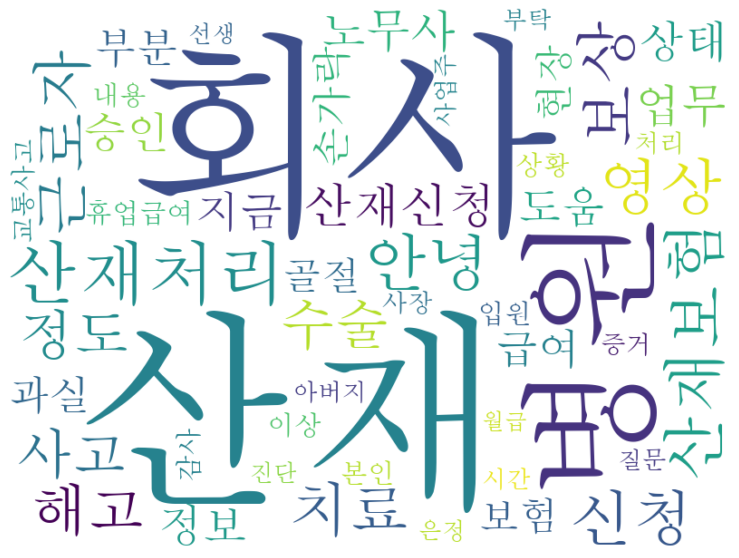

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(answer_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

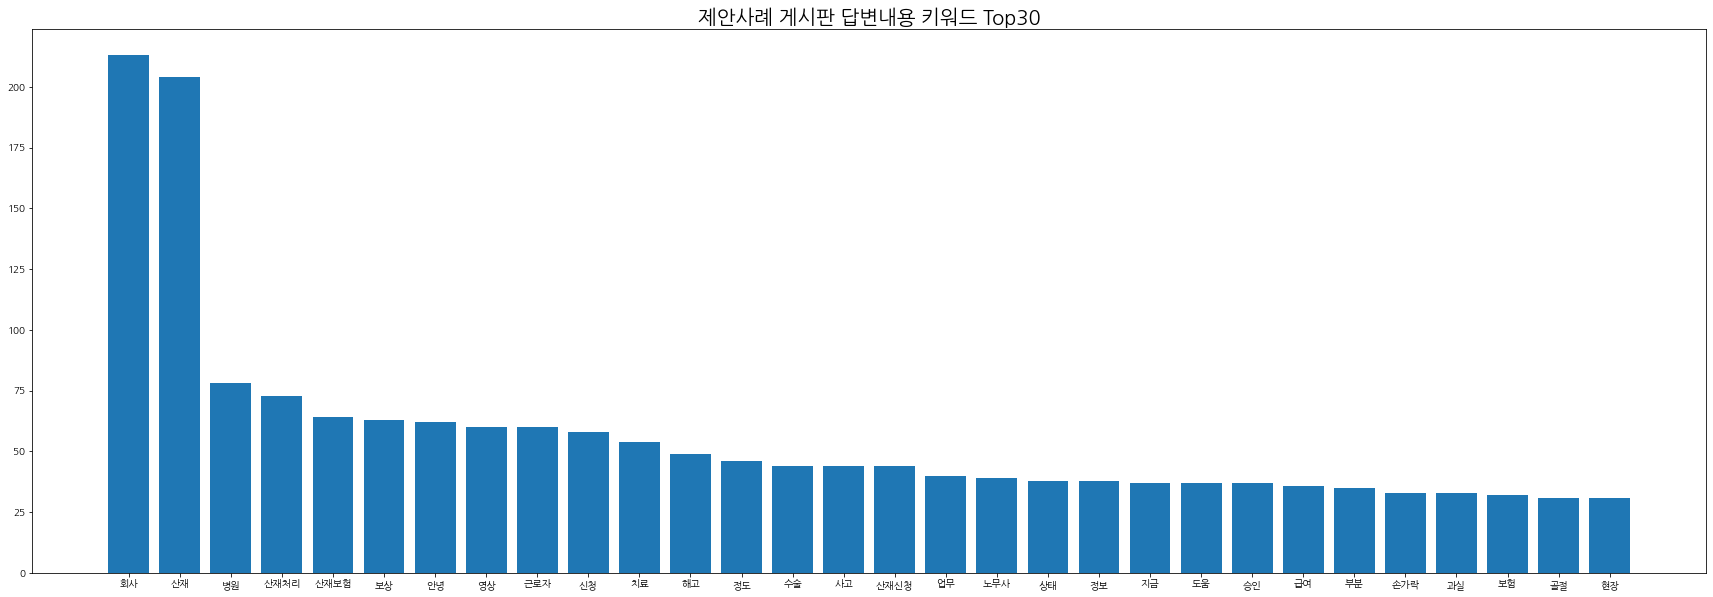

In [90]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_title_keys=[i for i in answer_top50.keys()]
top_title_values=[i for i in answer_top50.values()]

plt.figure(figsize= (30,10))
plt.title("제안사례 게시판 답변내용 키워드 Top30", fontsize=20)
plt.bar(list(top_title_keys[:30]), list(top_title_values[:30]))
plt.show()

In [91]:
#content_top_100 

answer_top50_word2id = {w: i for i, w in enumerate(answer_top50.keys())}
answer_top50_word2id

{'회사': 0,
 '산재': 1,
 '병원': 2,
 '산재처리': 3,
 '산재보험': 4,
 '보상': 5,
 '안녕': 6,
 '영상': 7,
 '근로자': 8,
 '신청': 9,
 '치료': 10,
 '해고': 11,
 '정도': 12,
 '수술': 13,
 '사고': 14,
 '산재신청': 15,
 '업무': 16,
 '노무사': 17,
 '상태': 18,
 '정보': 19,
 '지금': 20,
 '도움': 21,
 '승인': 22,
 '급여': 23,
 '부분': 24,
 '손가락': 25,
 '과실': 26,
 '보험': 27,
 '골절': 28,
 '현장': 29,
 '휴업급여': 30,
 '상황': 31,
 '입원': 32,
 '내용': 33,
 '본인': 34,
 '감사': 35,
 '이상': 36,
 '교통사고': 37,
 '처리': 38,
 '증거': 39,
 '사장': 40,
 '아버지': 41,
 '시간': 42,
 '부탁': 43,
 '질문': 44,
 '사업주': 45,
 '선생': 46,
 '진단': 47,
 '은정': 48,
 '월급': 49}

In [92]:
#content_top_100 

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '산재': 1,
 '병원': 2,
 '산재처리': 3,
 '산재보험': 4,
 '보상': 5,
 '안녕': 6,
 '영상': 7,
 '근로자': 8,
 '신청': 9,
 '치료': 10,
 '해고': 11,
 '정도': 12,
 '수술': 13,
 '사고': 14,
 '산재신청': 15,
 '업무': 16,
 '노무사': 17,
 '상태': 18,
 '정보': 19,
 '지금': 20,
 '도움': 21,
 '승인': 22,
 '급여': 23,
 '부분': 24,
 '손가락': 25,
 '과실': 26,
 '보험': 27,
 '골절': 28,
 '현장': 29}

In [93]:

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '산재': 1,
 '병원': 2,
 '산재처리': 3,
 '산재보험': 4,
 '보상': 5,
 '안녕': 6,
 '영상': 7,
 '근로자': 8,
 '신청': 9,
 '치료': 10,
 '해고': 11,
 '정도': 12,
 '수술': 13,
 '사고': 14,
 '산재신청': 15,
 '업무': 16,
 '노무사': 17,
 '상태': 18,
 '정보': 19,
 '지금': 20,
 '도움': 21,
 '승인': 22,
 '급여': 23,
 '부분': 24,
 '손가락': 25,
 '과실': 26,
 '보험': 27,
 '골절': 28,
 '현장': 29}

In [94]:
answer_top50_id2word = {i: w for i, w in enumerate(answer_top50.keys())}
answer_top50_id2word

{0: '회사',
 1: '산재',
 2: '병원',
 3: '산재처리',
 4: '산재보험',
 5: '보상',
 6: '안녕',
 7: '영상',
 8: '근로자',
 9: '신청',
 10: '치료',
 11: '해고',
 12: '정도',
 13: '수술',
 14: '사고',
 15: '산재신청',
 16: '업무',
 17: '노무사',
 18: '상태',
 19: '정보',
 20: '지금',
 21: '도움',
 22: '승인',
 23: '급여',
 24: '부분',
 25: '손가락',
 26: '과실',
 27: '보험',
 28: '골절',
 29: '현장',
 30: '휴업급여',
 31: '상황',
 32: '입원',
 33: '내용',
 34: '본인',
 35: '감사',
 36: '이상',
 37: '교통사고',
 38: '처리',
 39: '증거',
 40: '사장',
 41: '아버지',
 42: '시간',
 43: '부탁',
 44: '질문',
 45: '사업주',
 46: '선생',
 47: '진단',
 48: '은정',
 49: '월급'}

In [95]:
answer_top30_id2word = {i: w for i, w in enumerate(answer_top30.keys())}
answer_top30_id2word

{0: '회사',
 1: '산재',
 2: '병원',
 3: '산재처리',
 4: '산재보험',
 5: '보상',
 6: '안녕',
 7: '영상',
 8: '근로자',
 9: '신청',
 10: '치료',
 11: '해고',
 12: '정도',
 13: '수술',
 14: '사고',
 15: '산재신청',
 16: '업무',
 17: '노무사',
 18: '상태',
 19: '정보',
 20: '지금',
 21: '도움',
 22: '승인',
 23: '급여',
 24: '부분',
 25: '손가락',
 26: '과실',
 27: '보험',
 28: '골절',
 29: '현장'}

In [96]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top50_word2id.items():
        if wi in sentence:
            for wj, j in answer_top50_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_50[i][j] += 1
answer_adjacent_matrix_50

array([[ 0, 32, 11, ...,  0,  1,  5],
       [32,  0,  8, ...,  2,  1,  1],
       [11,  8,  0, ...,  4,  1,  2],
       ...,
       [ 0,  2,  4, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 5,  1,  2, ...,  0,  0,  0]])

In [97]:
answer_sentences_nouns_result

[['산재보험',
  '작년',
  '출근길',
  '빙판',
  '발목',
  '골절',
  '수술',
  '정도',
  '사고',
  '출근길',
  '사고',
  '산재처리',
  '동안',
  '요양',
  '휴업급여'],
 ['수술비'],
 ['치료비', '산재', '산재치료', '장해', '보상제도', '산재', '보상금', '근로복지공단', '심사'],
 ['안녕', '운돌', '무릎전방십자인대', '수술', '산재', '무릎수술후', '허리', '허리쪽', '문제', '처리'],
 ['제조공장', '전남편', '사고사'],
 [],
 ['대표자', '전남편', '직종특성', '다산'],
 ['이혼', '협의', '다남'],
 [],
 [],
 [],
 ['작업도중', '손톱', '병원', '몇일', '입원을해', '산재처리'],
 ['병원', '생계유지'],
 [],
 [],
 [],
 ['보상'],
 [],
 [],
 ['작업도중',
  '발목',
  '당시',
  '반깁스',
  '휴가철',
  '작년',
  '작해',
  '한의원',
  '통증의학과',
  '발목',
  '뼛조각',
  '비골하부',
  '수술',
  '산재신청'],
 [],
 ['처음', '당시', '뼈조각', '단말', '경험', '시간이지', '나타날수', '신청'],
 [],
 [],
 ['영상'],
 [],
 ['구독'],
 ['노무사', '아버지', '유족', '근로복지공단', '신청'],
 ['형편', '무료', '상담'],
 [],
 ['작업장', '계단', '요추', '골절', '산재처리'],
 [],
 ['댓글', '재해', '보상', '사실'],
 [],
 [],
 ['김노무사'],
 [],
 ['영상', '댓글'],
 ['산재'],
 [],
 [],
 ['정확'],
 [],
 [],
 ['납입'],
 ['산제보험'],
 [],
 [],
 [],
 ['회사', '다리'],
 ['병원', '진료', '반깁스'],
 ['회사', '산재보험', '적용', '산

In [98]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top30_word2id.items():
        if wi in sentence:
            for wj, j in answer_top30_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_30[i][j] += 1
answer_adjacent_matrix_30

array([[ 0, 32, 11, 11,  2, 10,  7,  3,  8,  8,  9,  9,  6,  4,  9, 11,
         6,  5,  3,  0,  9,  3,  8,  3,  7,  6,  3,  6,  2,  2],
       [32,  0,  8,  6,  6, 20,  9,  4,  4, 23, 16,  2,  6,  8,  8,  5,
         4,  8,  6,  3,  8,  3,  9,  6,  4,  5, 10,  8,  7,  6],
       [11,  8,  0, 11,  1,  1,  0,  1,  3,  1,  6,  0,  3,  4,  1,  5,
         2,  2,  0,  0,  3,  1,  1,  1,  0,  2,  0,  2,  3,  2],
       [11,  6, 11,  0,  1,  1,  1,  2,  1,  1,  2,  0,  2,  1,  5,  0,
         4,  1,  2,  0,  1,  2,  2,  3,  5,  3,  1,  0,  3,  1],
       [ 2,  6,  1,  1,  0,  3,  0,  3,  6,  1,  0,  0,  1,  1,  3,  0,
         1,  0,  0,  1,  0,  0,  0,  6,  0,  0,  2,  3,  1,  1],
       [10, 20,  1,  1,  3,  0,  2,  1,  0,  1,  4,  1,  5,  2,  3,  1,
         1,  0,  3,  1,  4,  0,  0,  1,  3,  2,  1,  2,  0,  1],
       [ 7,  9,  0,  1,  0,  2,  0,  4,  2,  4,  3,  2,  0,  3,  2,  1,
         2,  5,  3,  3,  2,  0,  1,  1,  1,  1,  2,  0,  0,  1],
       [ 3,  4,  1,  2,  3,  1,  4,  0,  

In [99]:
answer_adjacent_matrix_50.shape, answer_adjacent_matrix_30.shape

((50, 50), (30, 30))

In [100]:
import networkx as nx
answer_network_30 = nx.from_numpy_matrix(answer_adjacent_matrix_30)
list(answer_network_30.adjacency())

[(0,
  {1: {'weight': 32},
   2: {'weight': 11},
   3: {'weight': 11},
   4: {'weight': 2},
   5: {'weight': 10},
   6: {'weight': 7},
   7: {'weight': 3},
   8: {'weight': 8},
   9: {'weight': 8},
   10: {'weight': 9},
   11: {'weight': 9},
   12: {'weight': 6},
   13: {'weight': 4},
   14: {'weight': 9},
   15: {'weight': 11},
   16: {'weight': 6},
   17: {'weight': 5},
   18: {'weight': 3},
   20: {'weight': 9},
   21: {'weight': 3},
   22: {'weight': 8},
   23: {'weight': 3},
   24: {'weight': 7},
   25: {'weight': 6},
   26: {'weight': 3},
   27: {'weight': 6},
   28: {'weight': 2},
   29: {'weight': 2}}),
 (1,
  {0: {'weight': 32},
   2: {'weight': 8},
   3: {'weight': 6},
   4: {'weight': 6},
   5: {'weight': 20},
   6: {'weight': 9},
   7: {'weight': 4},
   8: {'weight': 4},
   9: {'weight': 23},
   10: {'weight': 16},
   11: {'weight': 2},
   12: {'weight': 6},
   13: {'weight': 8},
   14: {'weight': 8},
   15: {'weight': 5},
   16: {'weight': 4},
   17: {'weight': 8},
   18: 

In [101]:
answer_network_50 = nx.from_numpy_matrix(answer_adjacent_matrix_50)
list(answer_network_50.adjacency())

[(0,
  {1: {'weight': 32},
   2: {'weight': 11},
   3: {'weight': 11},
   4: {'weight': 2},
   5: {'weight': 10},
   6: {'weight': 7},
   7: {'weight': 3},
   8: {'weight': 8},
   9: {'weight': 8},
   10: {'weight': 9},
   11: {'weight': 9},
   12: {'weight': 6},
   13: {'weight': 4},
   14: {'weight': 9},
   15: {'weight': 11},
   16: {'weight': 6},
   17: {'weight': 5},
   18: {'weight': 3},
   20: {'weight': 9},
   21: {'weight': 3},
   22: {'weight': 8},
   23: {'weight': 3},
   24: {'weight': 7},
   25: {'weight': 6},
   26: {'weight': 3},
   27: {'weight': 6},
   28: {'weight': 2},
   29: {'weight': 2},
   30: {'weight': 4},
   31: {'weight': 4},
   32: {'weight': 6},
   33: {'weight': 1},
   34: {'weight': 2},
   35: {'weight': 1},
   36: {'weight': 7},
   37: {'weight': 3},
   38: {'weight': 9},
   39: {'weight': 4},
   40: {'weight': 4},
   41: {'weight': 4},
   42: {'weight': 2},
   43: {'weight': 1},
   44: {'weight': 4},
   45: {'weight': 4},
   48: {'weight': 1},
   49: {'

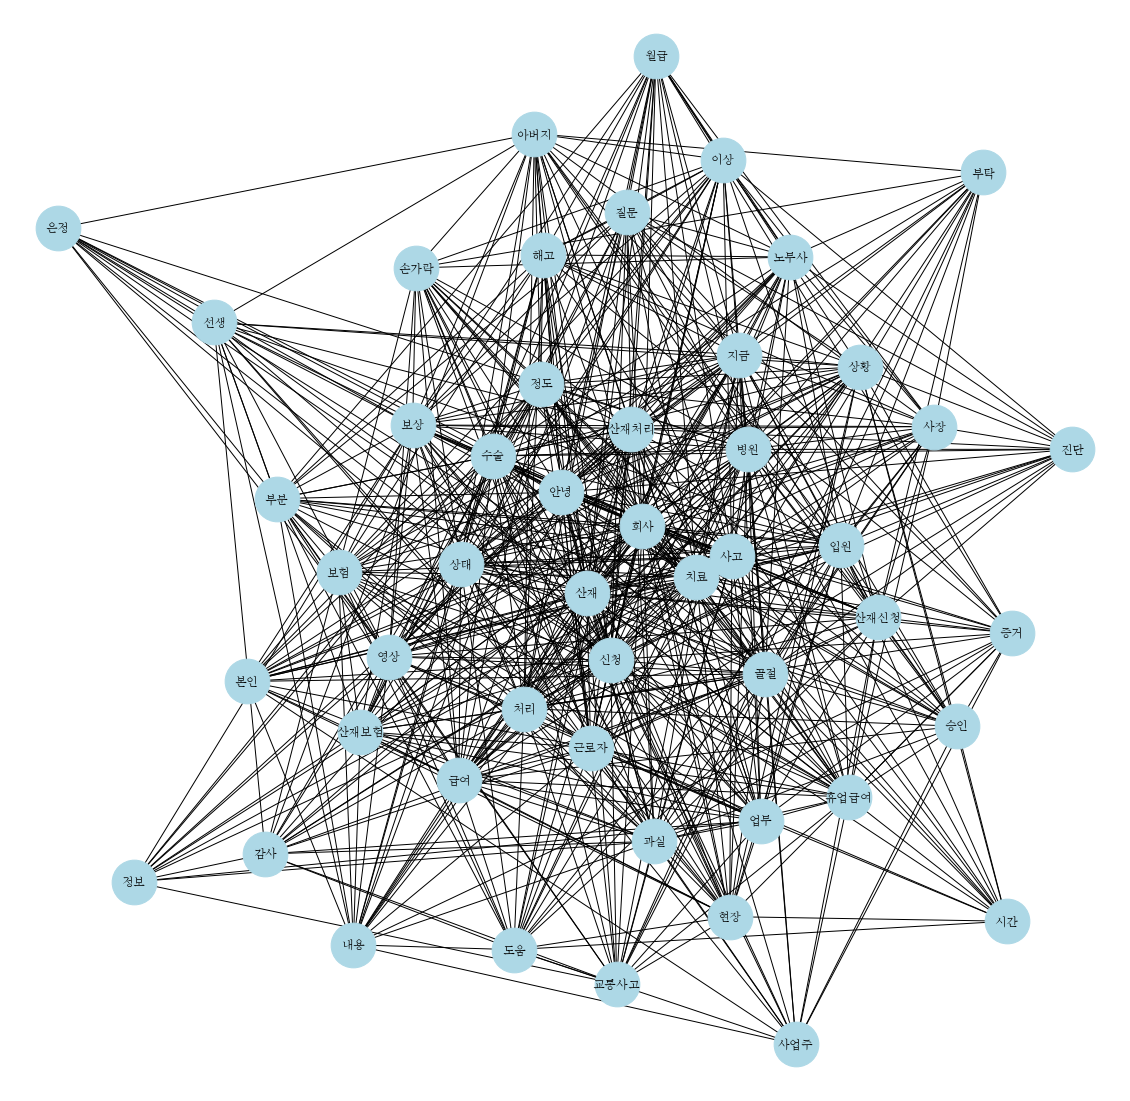

In [102]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_50, labels=answer_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

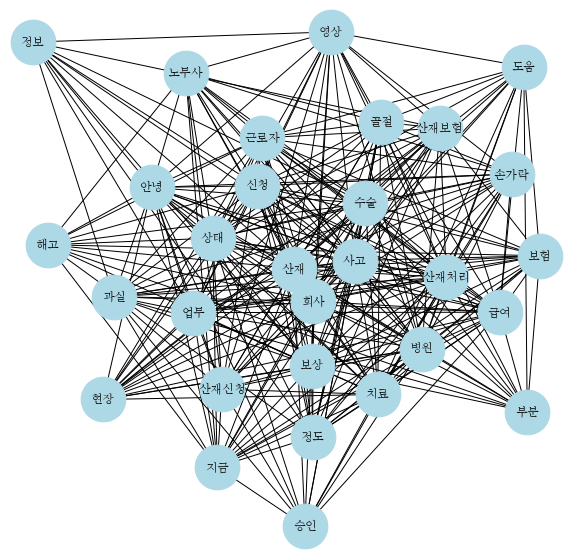

In [103]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_30, labels=answer_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

# 근접중심성

In [104]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.46226415094339623,
 1: 0.48514851485148514,
 2: 0.5697674418604651,
 3: 0.5903614457831325,
 4: 0.5632183908045977,
 5: 0.6125,
 6: 0.550561797752809,
 7: 0.550561797752809,
 8: 0.5903614457831325,
 9: 0.5975609756097561,
 10: 0.5268817204301075,
 11: 0.5697674418604651,
 12: 0.550561797752809,
 13: 0.5697674418604651,
 14: 0.6125,
 15: 0.5833333333333334,
 16: 0.5697674418604651,
 17: 0.5764705882352941,
 18: 0.5764705882352941,
 19: 0.5157894736842106,
 20: 0.5632183908045977,
 21: 0.5697674418604651,
 22: 0.5568181818181818,
 23: 0.5697674418604651,
 24: 0.6049382716049383,
 25: 0.550561797752809,
 26: 0.5568181818181818,
 27: 0.5764705882352941,
 28: 0.5764705882352941,
 29: 0.6049382716049383,
 30: 0.5632183908045977,
 31: 0.6125,
 32: 0.5903614457831325,
 33: 0.5632183908045977,
 34: 0.5764705882352941,
 35: 0.550561797752809,
 36: 0.5568181818181818,
 37: 0.5568181818181818,
 38: 0.5975609756097561,
 39: 0.5157894736842106,
 40: 0.5833333333333334,
 41: 0.5975609756097561,

In [105]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.3118279569892473,
 1: 0.2636363636363636,
 2: 0.5471698113207547,
 3: 0.5686274509803921,
 4: 0.5471698113207547,
 5: 0.5918367346938775,
 6: 0.5272727272727272,
 7: 0.5178571428571429,
 8: 0.5686274509803921,
 9: 0.5272727272727272,
 10: 0.4264705882352941,
 11: 0.5,
 12: 0.5178571428571429,
 13: 0.5272727272727272,
 14: 0.5576923076923077,
 15: 0.5471698113207547,
 16: 0.5087719298245614,
 17: 0.5178571428571429,
 18: 0.5178571428571429,
 19: 0.5178571428571429,
 20: 0.5178571428571429,
 21: 0.5471698113207547,
 22: 0.5087719298245614,
 23: 0.5576923076923077,
 24: 0.5370370370370371,
 25: 0.5,
 26: 0.5272727272727272,
 27: 0.5272727272727272,
 28: 0.5272727272727272,
 29: 0.6041666666666666}

# 연결중심성

In [106]:
#Degree
nx.degree_centrality(answer_network_50)

{0: 0.9387755102040816,
 1: 0.9999999999999999,
 2: 0.7755102040816326,
 3: 0.7551020408163265,
 4: 0.5102040816326531,
 5: 0.6938775510204082,
 6: 0.7142857142857142,
 7: 0.5510204081632653,
 8: 0.6530612244897959,
 9: 0.8571428571428571,
 10: 0.6326530612244897,
 11: 0.4693877551020408,
 12: 0.5918367346938775,
 13: 0.7142857142857142,
 14: 0.8163265306122448,
 15: 0.5714285714285714,
 16: 0.5510204081632653,
 17: 0.5102040816326531,
 18: 0.6530612244897959,
 19: 0.26530612244897955,
 20: 0.6326530612244897,
 21: 0.44897959183673464,
 22: 0.42857142857142855,
 23: 0.6122448979591836,
 24: 0.4897959183673469,
 25: 0.44897959183673464,
 26: 0.5510204081632653,
 27: 0.4897959183673469,
 28: 0.6122448979591836,
 29: 0.5102040816326531,
 30: 0.5510204081632653,
 31: 0.5306122448979591,
 32: 0.6122448979591836,
 33: 0.4081632653061224,
 34: 0.42857142857142855,
 35: 0.36734693877551017,
 36: 0.4693877551020408,
 37: 0.4081632653061224,
 38: 0.5918367346938775,
 39: 0.3877551020408163,
 40:

In [107]:
#Degree
nx.degree_centrality(answer_network_30)

{0: 0.9655172413793103,
 1: 1.0,
 2: 0.7931034482758621,
 3: 0.8620689655172413,
 4: 0.6206896551724138,
 5: 0.8275862068965517,
 6: 0.7931034482758621,
 7: 0.6206896551724138,
 8: 0.7931034482758621,
 9: 0.8275862068965517,
 10: 0.7241379310344828,
 11: 0.4482758620689655,
 12: 0.6551724137931034,
 13: 0.8275862068965517,
 14: 0.9310344827586207,
 15: 0.6206896551724138,
 16: 0.6551724137931034,
 17: 0.5517241379310345,
 18: 0.7586206896551724,
 19: 0.3793103448275862,
 20: 0.6551724137931034,
 21: 0.48275862068965514,
 22: 0.4482758620689655,
 23: 0.8275862068965517,
 24: 0.48275862068965514,
 25: 0.6206896551724138,
 26: 0.6206896551724138,
 27: 0.6206896551724138,
 28: 0.6896551724137931,
 29: 0.5862068965517241}

# 위세중심성

In [108]:
#Eigenvector
nx.eigenvector_centrality(answer_network_50, weight='weight')

{0: 0.4289976007236593,
 1: 0.4858947202497122,
 2: 0.18607740830543545,
 3: 0.15917404557842812,
 4: 0.09155191449281537,
 5: 0.19957230476113721,
 6: 0.14497697375078794,
 7: 0.07436590458634981,
 8: 0.11920539330693067,
 9: 0.22702639119775628,
 10: 0.21235744543905022,
 11: 0.0834808640537377,
 12: 0.13609650908726925,
 13: 0.1445557689905045,
 14: 0.16781494243398823,
 15: 0.13043154234192805,
 16: 0.10729690201491673,
 17: 0.10134887550260316,
 18: 0.10536990394185691,
 19: 0.037312410627781616,
 20: 0.14930627063141744,
 21: 0.055850986663892994,
 22: 0.1141475995137069,
 23: 0.10638540153252023,
 24: 0.08235607611130911,
 25: 0.09056553685917818,
 26: 0.10864568318124403,
 27: 0.10820200633729933,
 28: 0.1133175610694145,
 29: 0.07000867784670137,
 30: 0.08806256905061488,
 31: 0.0735970961602982,
 32: 0.12222488610210334,
 33: 0.05627078746164505,
 34: 0.060441090728627696,
 35: 0.050169972459472134,
 36: 0.0779468816272853,
 37: 0.07890579306020011,
 38: 0.14096063537762776,


In [109]:
#Eigenvector
nx.eigenvector_centrality(answer_network_30, weight='weight')

{0: 0.4458269766264958,
 1: 0.5070962754011493,
 2: 0.18618627686051795,
 3: 0.1692150581037014,
 4: 0.09328120538222097,
 5: 0.2227276462897635,
 6: 0.14962855149044268,
 7: 0.07616375039811416,
 8: 0.1268869620681042,
 9: 0.2388214792057598,
 10: 0.23203971991572028,
 11: 0.08691513295803886,
 12: 0.14533951863219313,
 13: 0.15431653294584458,
 14: 0.18502154252943143,
 15: 0.14002039057723967,
 16: 0.11400217496289233,
 17: 0.10960486627308248,
 18: 0.11079817308586129,
 19: 0.03897559602751966,
 20: 0.15863785263685595,
 21: 0.055045329598513784,
 22: 0.12315143940825131,
 23: 0.11760682915385379,
 24: 0.08726730160406962,
 25: 0.10356670721194226,
 26: 0.11299219215396293,
 27: 0.12282628668061597,
 28: 0.11720225598106915,
 29: 0.07110048718642825}

# 근접중심성

In [110]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_50)

{0: 0.32371789915549,
 1: 0.330995546219096,
 2: 0.3013413425368405,
 3: 0.29806221377368974,
 4: 0.24987591295066347,
 5: 0.2877861521254002,
 6: 0.29136746097261457,
 7: 0.2593584317536114,
 8: 0.28051448276845853,
 9: 0.31329212777559245,
 10: 0.2764748782787657,
 11: 0.2392910000577014,
 12: 0.2681894088452226,
 13: 0.29134179375994307,
 14: 0.3073428475487482,
 15: 0.26389727692285236,
 16: 0.25943972691581796,
 17: 0.24957987269242837,
 18: 0.2804468130479664,
 19: 0.1711406105763257,
 20: 0.2764028546427038,
 21: 0.23387747583417362,
 22: 0.22812980980815115,
 23: 0.2724035596253462,
 24: 0.24476835246399178,
 25: 0.234023449635469,
 26: 0.2593224200576418,
 27: 0.2448065585588092,
 28: 0.2723657329360893,
 29: 0.24987784728424134,
 30: 0.2594437377378001,
 31: 0.2546189425716154,
 32: 0.2724335182171292,
 33: 0.2219830264368168,
 34: 0.22830323635011404,
 35: 0.20914829230123444,
 36: 0.2391866347313419,
 37: 0.22199590310034592,
 38: 0.2683068426671497,
 39: 0.2155441353784094

In [111]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_30)

{0: 0.3973598863955093,
 1: 0.40339504799045284,
 2: 0.3640214226082999,
 3: 0.3782850200972613,
 4: 0.32211164510358364,
 5: 0.37141033316274175,
 6: 0.3642445846190765,
 7: 0.3224554327750701,
 8: 0.3642013390096232,
 9: 0.37127823857275516,
 10: 0.34842064697059616,
 11: 0.26788818852692486,
 12: 0.3315154133684684,
 13: 0.3714452283870711,
 14: 0.3912915029681685,
 15: 0.3223785525501483,
 16: 0.3314771041144092,
 17: 0.3023090803730687,
 18: 0.35640366279968616,
 19: 0.24135407583279797,
 20: 0.33145467462756617,
 21: 0.28008792764023216,
 22: 0.2680729064860207,
 23: 0.37123938537017526,
 24: 0.2803199119601516,
 25: 0.3224213672681362,
 26: 0.32234928199153634,
 27: 0.32225535470162764,
 28: 0.339922021469437,
 29: 0.31266510471872183}

In [112]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.46226415094339623,
 1: 0.48514851485148514,
 2: 0.5697674418604651,
 3: 0.5903614457831325,
 4: 0.5632183908045977,
 5: 0.6125,
 6: 0.550561797752809,
 7: 0.550561797752809,
 8: 0.5903614457831325,
 9: 0.5975609756097561,
 10: 0.5268817204301075,
 11: 0.5697674418604651,
 12: 0.550561797752809,
 13: 0.5697674418604651,
 14: 0.6125,
 15: 0.5833333333333334,
 16: 0.5697674418604651,
 17: 0.5764705882352941,
 18: 0.5764705882352941,
 19: 0.5157894736842106,
 20: 0.5632183908045977,
 21: 0.5697674418604651,
 22: 0.5568181818181818,
 23: 0.5697674418604651,
 24: 0.6049382716049383,
 25: 0.550561797752809,
 26: 0.5568181818181818,
 27: 0.5764705882352941,
 28: 0.5764705882352941,
 29: 0.6049382716049383,
 30: 0.5632183908045977,
 31: 0.6125,
 32: 0.5903614457831325,
 33: 0.5632183908045977,
 34: 0.5764705882352941,
 35: 0.550561797752809,
 36: 0.5568181818181818,
 37: 0.5568181818181818,
 38: 0.5975609756097561,
 39: 0.5157894736842106,
 40: 0.5833333333333334,
 41: 0.5975609756097561,

In [113]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.3118279569892473,
 1: 0.2636363636363636,
 2: 0.5471698113207547,
 3: 0.5686274509803921,
 4: 0.5471698113207547,
 5: 0.5918367346938775,
 6: 0.5272727272727272,
 7: 0.5178571428571429,
 8: 0.5686274509803921,
 9: 0.5272727272727272,
 10: 0.4264705882352941,
 11: 0.5,
 12: 0.5178571428571429,
 13: 0.5272727272727272,
 14: 0.5576923076923077,
 15: 0.5471698113207547,
 16: 0.5087719298245614,
 17: 0.5178571428571429,
 18: 0.5178571428571429,
 19: 0.5178571428571429,
 20: 0.5178571428571429,
 21: 0.5471698113207547,
 22: 0.5087719298245614,
 23: 0.5576923076923077,
 24: 0.5370370370370371,
 25: 0.5,
 26: 0.5272727272727272,
 27: 0.5272727272727272,
 28: 0.5272727272727272,
 29: 0.6041666666666666}

# 매개중심성

In [114]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_50)

{0: 0.06006655280272679,
 1: 0.06567845019093947,
 2: 0.050946627228487786,
 3: 0.04614743082800565,
 4: 0.03312297216115016,
 5: 0.04472011221276389,
 6: 0.04659457514578399,
 7: 0.03980948852330826,
 8: 0.04371243591907901,
 9: 0.05716976957158008,
 10: 0.038922983413902885,
 11: 0.03133718623979066,
 12: 0.03852483759601502,
 13: 0.045106295386508316,
 14: 0.051870862406067496,
 15: 0.037608067896995646,
 16: 0.03486530679986102,
 17: 0.03263551179411045,
 18: 0.040465527462783465,
 19: 0.017826397232124414,
 20: 0.03981776376254497,
 21: 0.03267092528090932,
 22: 0.027961496138089025,
 23: 0.03543488613346229,
 24: 0.03450737347562084,
 25: 0.02725823359585661,
 26: 0.03953987946759471,
 27: 0.031122373784930105,
 28: 0.04051506963949857,
 29: 0.03205724966386555,
 30: 0.03367390573654871,
 31: 0.034972937798777665,
 32: 0.03931701051302233,
 33: 0.029716347158514664,
 34: 0.026731528759165474,
 35: 0.026501770242800482,
 36: 0.028975349254137885,
 37: 0.02827577059260802,
 38: 0.0

In [115]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_30)

{0: 0.0684389774827305,
 1: 0.07282071750917632,
 2: 0.05663614810282612,
 3: 0.060802223901469506,
 4: 0.04537208959000674,
 5: 0.06089888166897999,
 6: 0.06057314137241886,
 7: 0.04934900433121461,
 8: 0.05841958856513979,
 9: 0.05930261901129243,
 10: 0.05108899985008705,
 11: 0.035072080410842456,
 12: 0.04797816124998679,
 13: 0.06027717900353324,
 14: 0.06631731472358869,
 15: 0.04693183947794263,
 16: 0.04795250291626944,
 17: 0.04015901805176695,
 18: 0.05542654469137631,
 19: 0.029468978153214535,
 20: 0.048676221582678654,
 21: 0.037550549554938396,
 22: 0.032421908056961456,
 23: 0.05811730874158695,
 24: 0.0375869097083672,
 25: 0.04155584463035894,
 26: 0.04899794947655865,
 27: 0.04715383701797381,
 28: 0.05006635909222177,
 29: 0.039951493408881066}

In [116]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(answer_network_50)

{0: 0.7608585182451926,
 1: 0.7896253356469866,
 2: 0.6304974880051609,
 3: 0.6372300994515953,
 4: 0.38446082922581937,
 5: 0.568327760218167,
 6: 0.5772363129603602,
 7: 0.39342373062343194,
 8: 0.5093213694702456,
 9: 0.6919879442232229,
 10: 0.5216022363839158,
 11: 0.31917821836841437,
 12: 0.4652163491543274,
 13: 0.5978859502866855,
 14: 0.6770885004997659,
 15: 0.43591517426187554,
 16: 0.43475981323956264,
 17: 0.3838749631585188,
 18: 0.5411574995980355,
 19: 0.12998342012279618,
 20: 0.5096748129956759,
 21: 0.279356483729669,
 22: 0.29867264851771963,
 23: 0.5190282843756,
 24: 0.3320950326076772,
 25: 0.3428494164430462,
 26: 0.38718356898370027,
 27: 0.36101082077349217,
 28: 0.4784727313369147,
 29: 0.396428865308004,
 30: 0.44442518666282604,
 31: 0.39752017808158935,
 32: 0.4883621534522582,
 33: 0.23208631776330743,
 34: 0.31044326181779536,
 35: 0.20978538711251465,
 36: 0.34969057546657895,
 37: 0.260531020085971,
 38: 0.4618364030123567,
 39: 0.223049908154288,
 40

In [117]:
G1_answer_50words=nx.Graph(answer_network_50, labels=answer_top50_word2id, font_family=font_name, ax=ax)
G1_answer_50words

In [118]:
G1_answer_30words=nx.Graph(answer_network_30, labels=answer_top30_word2id, font_family=font_name, ax=ax)
G1_answer_30words

In [119]:
# nx.write_gexf(G1_answer_50words, '산업재해보상보험_50keyword_graph.gexf')

In [120]:
# nx.write_gexf(G1_answer_30words, '산업재해보상보험_30keyword_graph.gexf')

In [121]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top50_word2id.keys())
values = list(nx.degree_centrality(answer_network_50).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.9387755102040816,
 '산재': 0.9999999999999999,
 '병원': 0.7755102040816326,
 '산재처리': 0.7551020408163265,
 '산재보험': 0.5102040816326531,
 '보상': 0.6938775510204082,
 '안녕': 0.7142857142857142,
 '영상': 0.5510204081632653,
 '근로자': 0.6530612244897959,
 '신청': 0.8571428571428571,
 '치료': 0.6326530612244897,
 '해고': 0.4693877551020408,
 '정도': 0.5918367346938775,
 '수술': 0.7142857142857142,
 '사고': 0.8163265306122448,
 '산재신청': 0.5714285714285714,
 '업무': 0.5510204081632653,
 '노무사': 0.5102040816326531,
 '상태': 0.6530612244897959,
 '정보': 0.26530612244897955,
 '지금': 0.6326530612244897,
 '도움': 0.44897959183673464,
 '승인': 0.42857142857142855,
 '급여': 0.6122448979591836,
 '부분': 0.4897959183673469,
 '손가락': 0.44897959183673464,
 '과실': 0.5510204081632653,
 '보험': 0.4897959183673469,
 '골절': 0.6122448979591836,
 '현장': 0.5102040816326531,
 '휴업급여': 0.5510204081632653,
 '상황': 0.5306122448979591,
 '입원': 0.6122448979591836,
 '내용': 0.4081632653061224,
 '본인': 0.42857142857142855,
 '감사': 0.36734693877551017,
 '이상': 0.46

In [122]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top30_word2id.keys())
values = list(nx.degree_centrality(answer_network_30).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.9655172413793103,
 '산재': 1.0,
 '병원': 0.7931034482758621,
 '산재처리': 0.8620689655172413,
 '산재보험': 0.6206896551724138,
 '보상': 0.8275862068965517,
 '안녕': 0.7931034482758621,
 '영상': 0.6206896551724138,
 '근로자': 0.7931034482758621,
 '신청': 0.8275862068965517,
 '치료': 0.7241379310344828,
 '해고': 0.4482758620689655,
 '정도': 0.6551724137931034,
 '수술': 0.8275862068965517,
 '사고': 0.9310344827586207,
 '산재신청': 0.6206896551724138,
 '업무': 0.6551724137931034,
 '노무사': 0.5517241379310345,
 '상태': 0.7586206896551724,
 '정보': 0.3793103448275862,
 '지금': 0.6551724137931034,
 '도움': 0.48275862068965514,
 '승인': 0.4482758620689655,
 '급여': 0.8275862068965517,
 '부분': 0.48275862068965514,
 '손가락': 0.6206896551724138,
 '과실': 0.6206896551724138,
 '보험': 0.6206896551724138,
 '골절': 0.6896551724137931,
 '현장': 0.5862068965517241}

In [123]:
answer_top50_word2id

{'회사': 0,
 '산재': 1,
 '병원': 2,
 '산재처리': 3,
 '산재보험': 4,
 '보상': 5,
 '안녕': 6,
 '영상': 7,
 '근로자': 8,
 '신청': 9,
 '치료': 10,
 '해고': 11,
 '정도': 12,
 '수술': 13,
 '사고': 14,
 '산재신청': 15,
 '업무': 16,
 '노무사': 17,
 '상태': 18,
 '정보': 19,
 '지금': 20,
 '도움': 21,
 '승인': 22,
 '급여': 23,
 '부분': 24,
 '손가락': 25,
 '과실': 26,
 '보험': 27,
 '골절': 28,
 '현장': 29,
 '휴업급여': 30,
 '상황': 31,
 '입원': 32,
 '내용': 33,
 '본인': 34,
 '감사': 35,
 '이상': 36,
 '교통사고': 37,
 '처리': 38,
 '증거': 39,
 '사장': 40,
 '아버지': 41,
 '시간': 42,
 '부탁': 43,
 '질문': 44,
 '사업주': 45,
 '선생': 46,
 '진단': 47,
 '은정': 48,
 '월급': 49}

In [124]:
print(연결중심성.keys())

dict_keys(['회사', '산재', '병원', '산재처리', '산재보험', '보상', '안녕', '영상', '근로자', '신청', '치료', '해고', '정도', '수술', '사고', '산재신청', '업무', '노무사', '상태', '정보', '지금', '도움', '승인', '급여', '부분', '손가락', '과실', '보험', '골절', '현장'])
